Epoch 1/50


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5692 - loss: 0.6829 - val_accuracy: 0.5888 - val_loss: 0.6652
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5882 - loss: 0.6741 - val_accuracy: 0.5794 - val_loss: 0.6556
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6142 - loss: 0.6766 - val_accuracy: 0.5794 - val_loss: 0.6494
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5636 - loss: 0.6755 - val_accuracy: 0.6075 - val_loss: 0.6441
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6134 - loss: 0.6597 - val_accuracy: 0.6075 - val_loss: 0.6451
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6086 - loss: 0.6457 - val_accuracy: 0.6168 - val_loss: 0.6438
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5796 - loss: 0.6547 - val_accuracy: 0.6168 - val_loss: 0.6436
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6477 - loss: 0.6306 - val_accuracy: 0.6075 - val_loss: 0.6453
Ep

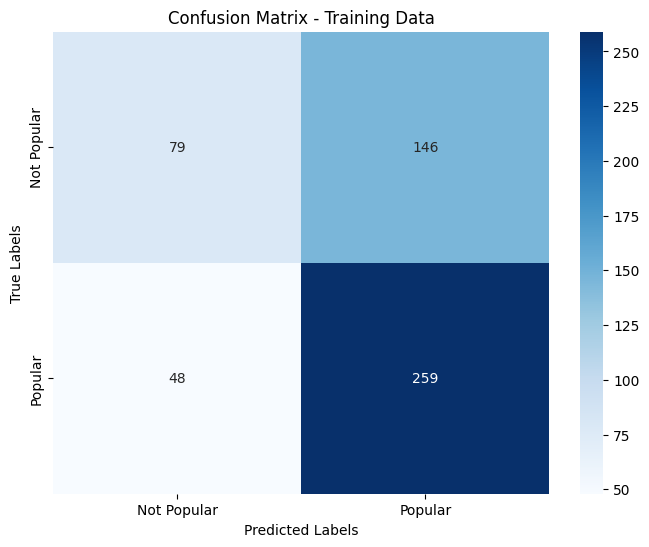

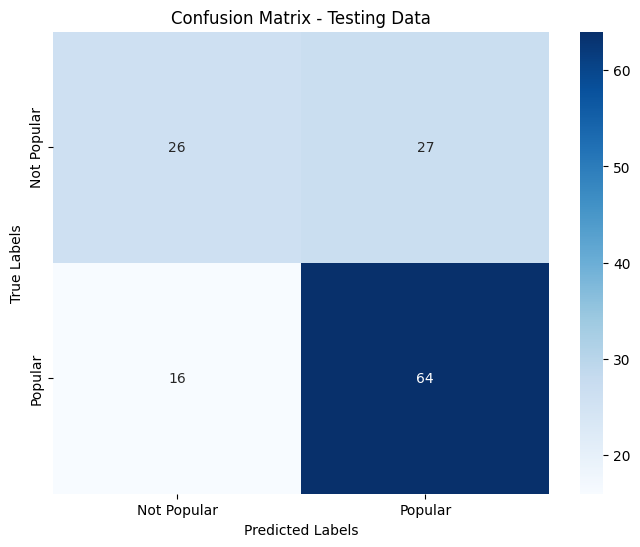

Training Metrics:
Accuracy: 63.53%
Mean Squared Error: 0.3647
Mean Absolute Error: 0.3647
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.35      0.45       225
           1       0.64      0.84      0.73       307

    accuracy                           0.64       532
   macro avg       0.63      0.60      0.59       532
weighted avg       0.63      0.64      0.61       532

Testing Metrics:
Accuracy: 67.67%
Mean Squared Error: 0.3233
Mean Absolute Error: 0.3233
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        53
           1       0.70      0.80      0.75        80

    accuracy                           0.68       133
   macro avg       0.66      0.65      0.65       133
weighted avg       0.67      0.68      0.67       133



In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("final_data.csv")

# Define the threshold for popularity
POPULARITY_THRESHOLD = 70
df["is_popular"] = (df["Spotify Popularity"] >= POPULARITY_THRESHOLD).astype(int)

# Select only audio features for the model
audio_features = [
    "danceability_%", "valence_%", "energy_%", "acousticness_%",
    "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"
]

features = audio_features
target = "is_popular"

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Split the dataset
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int).flatten()
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Calculate metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")
print("Classification Report:\n", train_report)

# Print testing metrics
print("Testing Metrics:")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print("Classification Report:\n", test_report)
